<a href="https://colab.research.google.com/github/adelic-matf/MM/blob/main/Linearna_Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linearna regresija

Neka su eksperimentalno utvrđene vrednosti slučajnih promenljivih


$$
y=\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots\\
y_{N}
\end{bmatrix}, \qquad
X_j=\begin{bmatrix}
x_{1j} \\
x_{2j} \\
\vdots\\
x_{Nj}
\end{bmatrix}, \qquad j=1,2,...,p.
$$

Prediktore $X_j$ ćemo upisati u matricu $X$

$$
X=[X_1\, X_2\, \cdots X_p].
$$


Problem želimo da modeliramo višestrukom linearnom regresijom:

$$ Y=f(X)=\sum_{j=1}^{p} w_j X_j+b=Xw+b, $$

gde je neophodno da odredimo nepoznate parametre $w_j, \, j=1,2,\dots, p$ i $b$, minimizacijom **funkcije greške**

$$ J(w,b)=\sum_{i=1}^N (Y_i-y_i)^2=\sum_{i=1}^N ((f(X))_i-y_i)^2.$$

U praksi se koristi srednje kvadratna greška, kako greška ne bi rasla sa brojem podataka, a time dobijamo prosečnu grešku po podatku. Zbog toga ćemo, umesto prethodne funkcije greške, implementirati funkciju

$$ J(w,b)=\frac{1}{N}\sum_{i=1}^N (Y_i-y_i)^2=\frac{1}{N}\sum_{i=1}^N ((f(X))_i-y_i)^2.$$

### Test primer sa jednim prediktorom

Matlab sve podatke koje dobija tretira kao matrice, odnosno kao dvodimenzione vektore, dok u Pajtonu nemamo tu lagodnost, već moramo unapred planirati i definisati sve promenljive ili kao vektore (1d arrays) ili kao matrice (2D arrays), u zavisnosti od toga šta su zahtevi zadatka. Za rad sa matricama i vektorima koristimo biblioteku numpy. Učitajmo je. Želimo i grafički da prikažemo rezultate, kako bismo lakše uočili greške i analizirali problem, pa ćemo učitati i biblioteku matplotlib, odnosno njen modul pyplot.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Pre nego krenemo sa implementacijom izaberimo neki **jednostavan test primer**, koji lako možemo analitički rešiti. Izaberimo, na primer, dve tačke (0,1) i (1,0) i fitujmo ih pravom. Očigledno, odgovarajuća prava je y=-x+1. Dakle, u ovom slučaju imamo kao prediktor matricu $X$ koja je vektor kolona, parametar $w$ je jednak $-1$, dok je bijas $b$ jednak $1$.

Primetimo sledeće, ako vrednosti prediktora (matrice $X$) upišemo u numpy promenljivu pod nazivom x_test na sledeći način:

In [2]:
x_test=np.array([0,1])
print(x_test)

[0 1]


dobili smo vektor (1D array). Promenljivu koja je definisana kao 1D array, Pajton ne tretira kao vektor vrstu ili vektor kolonu, već jednostavno kao niz brojeva! U zadatku smo definisali da različiti podaci za svaki od prediktora budu upisani u kolone matrice $X$, pa je potrebno da promenljivoj x_test promenimo oblik. Naš vektor x_test deluje kao vektor vrsta, a u Matalbu, od vektora vrste dobijamo vektor kolonu, transponovanjem. Ako primenimo isti postupak u Pajtonu

In [3]:
x_test=x_test.T
print(x_test)

[0 1]


nećemo dobiti željeni rezultat, jer smo x_test definisali kao vektor (1D array), a ne kao matricu (2D array)!




Jedno, vrlo uobičajeno rešenje, je da iskorsitimo funkciju **reshape(nv, nk)**, gde je **nv broj vrsta**, a **nk broj kolona** nove matrice. Ako želimo sve elemente smestiti u jednu kolonu, onda to možemo uraditi izborom da je nk=1, dok nv možemo prepustiti Pajtonu da izračuna tako što postavimo nv=-1:

In [4]:
x_test=x_test.reshape(-1,1) #1D array konvertujemo u vektor kolonu
print(x_test)

[[0]
 [1]]


Drugi način je da ulazni podatak definišemo u stratu kao vektor kolonu, tj. kao matricu dimenzije $N\times 1$

In [5]:
x_test=np.array([[0],[1]])
print(x_test)

[[0]
 [1]]


što može biti prilično neugodno za kucanje ako imamo veliki broj podataka. Ili da definišemo kao matricu vrstu dimenzije $1\times N$, pa transponujemo

In [6]:
x_test=np.array([[0,1]])
print("Matrica vrsta:", x_test)
x_test=x_test.T
print("Matrica vrsta nakon transponovanja je matrica kolona:\n", x_test)

Matrica vrsta: [[0 1]]
Matrica vrsta nakon transponovanja je matrica kolona:
 [[0]
 [1]]


Definišimo još  vrednosti vekotra $Y$ i upišimo ih u promenljivu y_test. Većina biblioteka za mašinsko učenje (Scikit-Learn, PyTorch, TensorFlow) je implementirana tako da se vekotr Y prosleđuje kao 1D array, pa ćemo radi usaglašavanja tako raditi i mi:

In [7]:
y_test=np.array([1,0])
print(y_test)

[1 0]


Ako je matrica $X$ dimenzije $n\times p$, da bi se matrično množenje u modelu pravilno izvelo, neophodno je da $w$ bude vektor dužine $p$. Vektor $w$ možemo proslediti kao 1D array u Pajtonu, samo je važno da je dužine $p$. Ako ga prosleđujemo kao vektor kolonu, onda moramo konstruisati matricu dimenzije $p\times 1$, i sve funkcije koje su ispod usaglasiti sa tim. Uglavnom, mi ćemo se držati načela da je $w$ 1d array, i ne smemo to zaboraviti!

Prva situacija gde nam je to važno je u 1D primeru. Parametar $w$ ćemo definisati kao 1d array sa

In [8]:
w_tacno=np.array([-1]) # a ne w=-1.

Još upišimo bias

In [9]:
b_tacno=1

### Test primer sa dva prediktora

Slično, da bismo testirali slučaj kada imamo više prediktora, možemo izabrati model:
$$ Y=1-X_1-X_2,$$
koji sadrži tačke (0,1,0), (1,0,0) i (0,0,1).

In [10]:
x_test2=np.array([[0,1,0],[1,0,0]]).T
print(x_test2)
y_test2=np.array([0,0,1])
print(y_test2)

[[0 1]
 [1 0]
 [0 0]]
[0 0 1]


Tačne vrednosti za prametre i bias su

In [11]:
w2=np.array([-1,-1])
b2=1

### Implementacija modela

Sada smo spremni da implementiramo linearnu regresiju. Prvo definišimo sam model, odnosno pridruživanje

$$ Y=f(X)=\sum_{j=1}^{p} w_j X_j+b=Xw+b, $$

Funkciju ćemo nazvati model. Ulazni argumenti će biti matrica x, vektor w (1d array) i bijas b (konstanta). U Pajtonu definicija ove funkcije izgleda ovako

In [12]:
def model(x,w,b):
    y=np.dot(x,w)+b
    return y

Ovde smo matrično množenje $Xw$ implementriali pomoću np.dot metoda.  Rezultat želimo da bude 1d array. Testirajmo

In [13]:
y_pred=model(x_test, w_tacno,b_tacno)
print(y_pred)

[1 0]


**Napomena:** Da smo $w_tacno$ definisali samo kao w_tacno=1, a ne kao w_tacno=np.array([-1]), rezultat bi bio vektor kolona!  A to ne želimo, jer u višedimenzinom slučaju će np.dot vratiti 1D array:

In [14]:
y_pred2=model(x_test2, w2,b2)
print(y_pred2)

[0 0 1]


Definisaćemo i funkciju grafik1D za skiciranje modela, koja će kao ulazne argumente imati eksperimentalne podatke x i y, kao i koeficijente w i b.

In [15]:
def grafik2D(x,y,w,b):
    yp=model(x, w,b)
    plt.plot(x,yp, label="model")
    plt.scatter(x,y, color="red", label='eksperimentalne tačne vrednosti')
    plt.legend()
    plt.title(f"Linearni model sa 1 prediktorom, w={w}, b={b} ")
    plt.show()

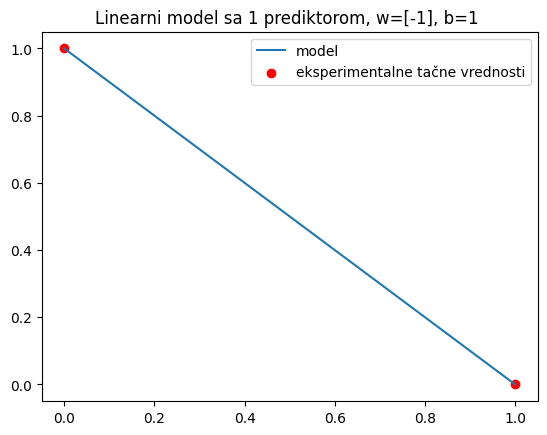

In [16]:
grafik2D(x_test,y_test,w_tacno,b_tacno)

Napravićemo i pomoćnu funkciju za iscrtavanje grafika u 3D, tj. grafika funkcije sa 2 nezavisne promenljive. Analiziraćemo kod drugi put, ako bude prilike, da se sad ne rasplinjujemo.

In [17]:
from mpl_toolkits.mplot3d import Axes3D
def grafik3D(x,y,w,b):
    # Vizualizacija rezultata
    fig = plt.figure()
    # syntax for 3-D projection
    ax = plt.axes(projection ='3d')

    ax.scatter(x[:, 0], x[:, 1], y, color="red", label="Eksperimentalne vrednosti")

    # Dodavanje procenjene ravni modela
    x1 = np.linspace(0, 1, 5)
    x2 = np.linspace(0, 1, 5)
    x1, x2 = np.meshgrid(x1, x2)
    xx = np.array([x1, x2])
    yp = model(xx.T, w, b)
    ax.plot_surface(x1, x2, yp, color="lightblue")

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")
    plt.title("Linearni model sa 2 prediktora")
    ax.legend()
    plt.show()

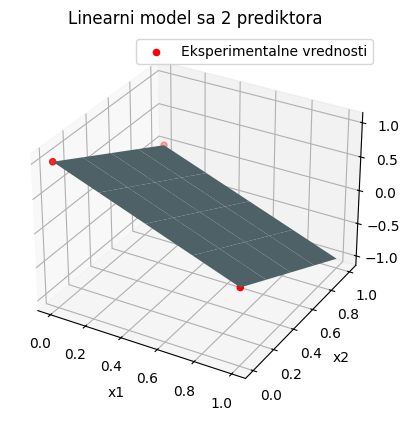

In [18]:
grafik3D(x_test2,y_test2,w2,b2)

## Funkcija greške

Sada treba da implementiramo funkciju $J(w,b)$. Da bismo izračunali njenu vrednost trebaju nam:
- w
- b
- x i y - eksperimentalne vrednosti
- yp - vrednost modela na x


Vrednost yp možemo izračunati, pa je nećemo prosleđivati kao argument. Jedan od načina implementacije je

In [19]:
def greska(x,y,w,b):
    f=model(x,w,b)
    N=x.shape[0]# broj vrsta, tj. test primera
    J=0
    for i in range(N):
        J=J+(f[i]-y[i])**2
    J=J/N
    return J

Definišimo neke početne vrednosti za w i b

In [20]:
w0=np.array([1])
b0=2

Testirajmo

In [21]:
J=greska(x_test, y_test,w0,b0)
print(f"J={J}")

J2=greska(x_test2, y_test2,w2,b2)
print(f"J={J2}")

J=5.0
J=0.0


Nedostatak ove implementacije je upotreba for petlje. Naime, kada se radi na velikom skupu podataka poželjno je vektorizovati računske operacije kad god je to moguće. Tada će numpy koristi optimizovane implementacije računskih operacija koje rade na mašinskom nivou i koriste paralelna izračunavanja, što omogućava mnogo brže izvršavanje koda. Vektorizovana implementacija bi bila, npr

In [22]:
def greska(x,y,w,b):
    f=model(x,w,b)
    J=np.mean((f-y)**2)
    #ili
    #N=x.shape[0]
    #J=np.sum((f-y)**2)/N
    return J

In [23]:
J=greska(x_test, y_test,w0,b0)
print(f"J={J}")

J2=greska(x_test2, y_test2,w2,b2)
print(f"J={J2}")

J=5.0
J=0.0


Konstruisaćemo grafike funkcija greške u odnosu na parametre $w$ i $b$. Prvo uradimo to za 1d primer. Izabraćemo više različitih vrednosti za $w$ dok ćemo bijas $b$ ostaiti fiksiranim:

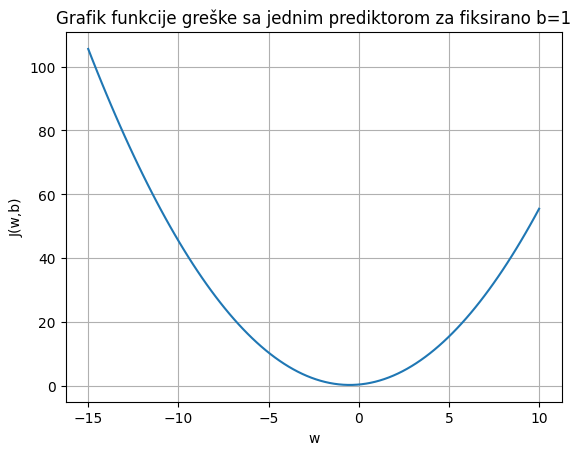

In [24]:
w_g=np.linspace(-15,10, 100)
b_g=1
##
# Generisanje podataka
J_g = np.array([greska(x_test, y_test, wt, b_g) for wt in w_g])

# Plotovanje
plt.plot(w_g, J_g)
plt.title(f"Grafik funkcije greške sa jednim prediktorom za fiksirano b={b_g}")
plt.xlabel("w")
plt.ylabel("J(w,b)")
plt.grid(True)
plt.show()

## Gradijentna metoda - metoda najbržeg spusta

 Da bismo odredili nepoznate parametre $w$ i $b$ koristićemo metodu najbržeg spusta.

Gradijenti funkcije greške su

$$
\frac{\partial J(w,b)}{\partial w_j}=\frac{2}{N}\sum_{i=1}^{N} ((f(X))_i-y_i)x_{ij}=\frac{2}{N} X_j^{T} (f(X)-Y)
$$

$$
\frac{\partial J(w,b)}{\partial b}=\frac{2}{N}\sum_{i=1}^{N} ((f(X))_i-y_i)
$$

Računaćemo ih u posebnoj funkciji, a kasnije te vrednosti koristiti u metodi najbržeg spusta.

In [25]:
def gradijenti(x,y,w,b):
    f=model(x,w,b)
    N=x.shape[0]
    db=2*np.sum(f-y)/N
    dw = 2 * np.dot(x.T, (f - y)) / N
    return dw, db, f

Testiramo

In [26]:
dw,db,f=gradijenti(x_test, y_test,w0,b0)
print(dw)
print(db)
print(f)

[3.]
4.0
[2 3]


Implementirajmo sada metodu najbržeg spusta. Ulazni argumenti će biti, osim eksperimentalnih vrednosti (x_test i y_test):
- početne vrednosti za w0 i b0
- alpha (learning rate)
- br_iter - broj iteracija koje dozvoljavamo da izvrši metoda.

Teorijski kriterijum zaustavljanja nećemo, jer zahteva rešavanje novog zadatka minimizacije. Čak nećemo ni praktični (kada dve uzastopno izračunate vrednosti postanu dovoljno male), već ćemo pustiti da se izvrši sav zadati broj iteracija. Ali zaštitićemo se od situacije da metod divergira: ako razlika dve uzastopne iteracije postane velika, onda ćemo ispisati poruku da metod divergira i prekinuti izračunavanja, jer to znači da smo izabrali preveliko alpha i time preskočili minimum. Implementacije je:

In [27]:
def nspust(x,y, w0,b0, alpha, br_iter):
    w=w0
    b=b0
    J0=greska(x,y,w,b)
    # zbog grafickog prikaza cemo cuvati iteracije i greske
    redbr_iter=[0]
    gr_iter=[J0]
    # iteriramo
    for i in range(br_iter):
        dw,db,f=gradijenti(x,y,w,b)
        w=w-alpha*dw
        b=b-alpha*db
        J=greska(x,y,w,b)
        if i%10==0:
            redbr_iter.append(i)
            gr_iter.append(J)
        # praktični kriterijum zaustavljanja
        #if abs(J-J0)<0.00000000000000001:
         #   print("Metod konvergira.")
          #  break
        if  abs(J-J0)>100:
            print(f"Nisu izvšene sve iteracije jer metod dalje ne konvergira. Smanjite alpha ili promenite početne vrednosti.")
            break
        J0=J
    return w,b, redbr_iter, gr_iter

Parametar alpha ($\alpha$) se u mašinskom učenju naziva **hiperparametrom**. A biranje najbolje vrednosti za njega se naziva **"hyperparameter tuning"**. Vrlo često to nije lak zadatak. Ali mi imamo jednostavan test primer, gde ćemo lako izabrati pravi.
Testirajmo kod za sledeće vrednosti

In [28]:
alpha=0.7
br_iter=500

w,b, redbr_iter, gr_iter=nspust(x_test,y_test, w0,b0, alpha, br_iter)
print(f"Koeficijent w je {w}")
print(f"Koeficijent b je {b}")

Koeficijent w je [-1.]
Koeficijent b je 1.0


Još jedan način da analiziramo konvergenciju metode, jeste da pogledamo grafik zavisnosti broja iteracije i vrednosti funkcije koja se minimizira.

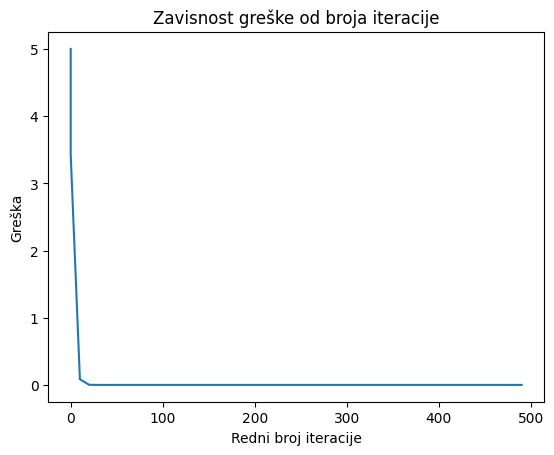

In [29]:
plt.plot(redbr_iter, gr_iter)
plt.xlabel('Redni broj iteracije')
plt.ylabel('Greška')
plt.title("Zavisnost greške od broja iteracije")
plt.show()

Testirajmo još i primer sa dva prediktora:

In [30]:
w,b, redbr_iter, gr_iter=nspust(x_test2,y_test2, np.array([-0.5,0.5]),1, alpha, br_iter)
print(f"Koeficijent w je {w}")
print(f"Koeficijent b je {b}")

Koeficijent w je [-1. -1.]
Koeficijent b je 0.9999999999999997


## Biblioteka Scikit learn

**Scikit-Learn** je popularna Python biblioteka za mašinsko učenje koja omogućava jednostavnu implementaciju raznih algoritama i alata za modeliranje podataka. Sadrži širok spektar algoritama za klasifikaciju, regresiju, redukciju dimenzionalnosti i mnoge druge tehnike koje su korisne u radu sa podacima. Lako radi sa Pandas DataFrames i NumPy nizovima, čineći pripremu podataka jednostavnijom. Pokazaćemo kako se koristi za problem linearne regresije. Učitaćemo modul LinearRegression iz biblioteke sklearn (Scikit-Learn):

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #kreiramo klasu linearne regresije
model.fit(x_test, y_test) # odredjujemo parametre modela

# štampamo vrednosti parametara
print("w=", model.coef_)
print("b=", model.intercept_)

w= [-1.]
b= 0.9999999999999999


Slično možemo testirati i problem sa dva prediktora

In [32]:
model.fit(x_test2, y_test2)

# Koeficijenti
print("w=", model.coef_)
print("b=", model.intercept_)

w= [-1. -1.]
b= 0.9999999999999998
